In [74]:
filename="Tweeter25anotation.Podejscie3.json"

In [75]:
import pandas as pd
import json

In [76]:
label_dict = {
    28:'Medyczne-diagnoza',
    29:'Medyczne',
    30:'Niejednoznaczny',
    31:'Error',
    32:'Niemedyczny'
}

In [77]:
df = pd.read_json(filename,lines=True)
df = df.drop(columns=['annotation_approver','meta'])
df=df.explode('annotations')
df=df.reset_index()
df


,index,id,text,annotations
0,0,147552,"O tym, jak to jest być drugi raz z rzędu final...","{'label': 32, 'user': 6, 'created_at': '2020-1..."
1,0,147552,"O tym, jak to jest być drugi raz z rzędu final...","{'label': 32, 'user': 3, 'created_at': '2020-1..."
2,0,147552,"O tym, jak to jest być drugi raz z rzędu final...","{'label': 32, 'user': 2, 'created_at': '2020-1..."
3,1,147432,@BeataPoProstu To fakt Pani @barbaraanowacka ....,"{'label': 32, 'user': 6, 'created_at': '2020-1..."
4,1,147432,@BeataPoProstu To fakt Pani @barbaraanowacka ....,"{'label': 32, 'user': 3, 'created_at': '2020-1..."
...,...,...,...,...
595,198,147531,"Walcząc z koronawirusem, nie możemy zapomnieć ...","{'label': 29, 'user': 3, 'created_at': '2020-1..."
596,198,147531,"Walcząc z koronawirusem, nie możemy zapomnieć ...","{'label': 29, 'user': 2, 'created_at': '2020-1..."
597,199,147535,Skoro chińska wirusolożka odkryła tys. zabójcz...,"{'label': 30, 'user': 6, 'created_at': '2020-1..."
598,199,147535,Skoro chińska wirusolożka odkryła tys. zabójcz...,"{'label': 29, 'user': 3, 'created_at': '2020-1..."


In [78]:
annotations = pd.json_normalize(df.annotations)
annotations

,label,user,created_at,updated_at
0,32,6,2020-12-11T21:15:22.006023Z,2020-12-11T21:15:22.006051Z
1,32,3,2020-12-11T22:46:18.959833Z,2020-12-11T22:46:18.959862Z
2,32,2,2020-12-11T23:28:54.279975Z,2020-12-11T23:28:54.280004Z
3,32,6,2020-12-11T20:53:38.044024Z,2020-12-11T20:53:38.044052Z
4,32,3,2020-12-11T22:14:32.528703Z,2020-12-11T22:14:32.528732Z
...,...,...,...,...
595,29,3,2020-12-11T22:33:57.520370Z,2020-12-11T22:33:57.520397Z
596,29,2,2020-12-11T23:24:29.959221Z,2020-12-11T23:24:29.959250Z
597,30,6,2020-12-11T21:11:07.117918Z,2020-12-11T21:11:07.117945Z
598,29,3,2020-12-11T22:34:24.315991Z,2020-12-11T22:34:24.316019Z


In [79]:
norm = pd.json_normalize(df['annotations'])
df['annotations']=norm['label']
df['user'] = norm['user']
coincidence_matrix = df.drop(columns=['index','text'])
df=df.drop(columns=['user'])
df.annotations=df.annotations.replace(label_dict)

In [80]:
ids = pd.unique(df.id)
df

,index,id,text,annotations
0,0,147552,"O tym, jak to jest być drugi raz z rzędu final...",Niemedyczny
1,0,147552,"O tym, jak to jest być drugi raz z rzędu final...",Niemedyczny
2,0,147552,"O tym, jak to jest być drugi raz z rzędu final...",Niemedyczny
3,1,147432,@BeataPoProstu To fakt Pani @barbaraanowacka ....,Niemedyczny
4,1,147432,@BeataPoProstu To fakt Pani @barbaraanowacka ....,Niemedyczny
...,...,...,...,...
595,198,147531,"Walcząc z koronawirusem, nie możemy zapomnieć ...",Medyczne
596,198,147531,"Walcząc z koronawirusem, nie możemy zapomnieć ...",Medyczne
597,199,147535,Skoro chińska wirusolożka odkryła tys. zabójcz...,Niejednoznaczny
598,199,147535,Skoro chińska wirusolożka odkryła tys. zabójcz...,Medyczne


In [81]:
coincidence_matrix

,id,annotations,user
0,147552,32,6
1,147552,32,3
2,147552,32,2
3,147432,32,6
4,147432,32,3
...,...,...,...
595,147531,29,3
596,147531,29,2
597,147535,30,6
598,147535,29,3


In [82]:

def vote(ann_id):
    
    vote_dict = {'Medyczne-diagnoza':0,'Medyczne':0,'Niemedyczny':0,'Niejednoznaczny':0,'Error':0}
    temp_df= df.loc[df['id'] == ann_id]
    text=temp_df['text'].iloc[0]
    groups_ann = temp_df.groupby(by=["annotations"]).count()

    max_vote=0
    vote_result = "NONE"
    for row in groups_ann.iterrows():
        ann=row[0]   
        vote_dict[ann]+=row[1][0]
    print(vote_dict,'id ',ann_id)
    for vote_key in vote_dict.keys():
        if max_vote < vote_dict[vote_key]:
            max_vote = vote_dict[vote_key]
            vote_result=vote_key
        elif max_vote == vote_dict[vote_key]:
            vote_result="Remis-sporny" 
    if vote_result=="Remis-sporny":
        print('spór')
        #print(ann_id,vote_dict)
    res =pd.DataFrame({
        'id':[ann_id],
        'text':[str(text)],
        'annotation_after_vote':[vote_result],
    })
    
    return res, vote_dict
            
    
    

In [83]:
result = pd.DataFrame([],columns=['id','text','annotation_after_vote'])
votes = pd.DataFrame([],columns=['Medyczne-diagnoza','Medyczne','Niemedyczny','Niejednoznaczny','Error'])
for ann_id in ids:
    vote_result,vote_dict=vote(ann_id)
    result=result.append(vote_result,ignore_index=True)
    votes = votes.append(vote_dict,ignore_index=True)


{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 3, 'Niejednoznaczny': 0, 'Error': 0} id  147552
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 3, 'Niejednoznaczny': 0, 'Error': 0} id  147432
{'Medyczne-diagnoza': 3, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  147433
{'Medyczne-diagnoza': 0, 'Medyczne': 3, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  147434
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 3} id  147435
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 3} id  147436
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 3} id  147437
{'Medyczne-diagnoza': 0, 'Medyczne': 3, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  147438
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 3, 'Niejednoznaczny': 0, 'Error': 0} id  147439
{'Medyczne-diagnoza': 2, 'Medyczne': 1, 'Niemedyczny': 0, 'Niejednoznaczn

{'Medyczne-diagnoza': 1, 'Medyczne': 2, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  147561
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 3, 'Niejednoznaczny': 0, 'Error': 0} id  147562
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 3, 'Niejednoznaczny': 0, 'Error': 0} id  147563
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 3, 'Niejednoznaczny': 0, 'Error': 0} id  147564
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 3} id  147565
{'Medyczne-diagnoza': 0, 'Medyczne': 0, 'Niemedyczny': 3, 'Niejednoznaczny': 0, 'Error': 0} id  147567
{'Medyczne-diagnoza': 1, 'Medyczne': 2, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  147568
{'Medyczne-diagnoza': 0, 'Medyczne': 3, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  147569
{'Medyczne-diagnoza': 0, 'Medyczne': 3, 'Niemedyczny': 0, 'Niejednoznaczny': 0, 'Error': 0} id  147570
{'Medyczne-diagnoza': 1, 'Medyczne': 2, 'Niemedyczny': 0, 'Niejednoznaczn

In [84]:
import simpledorff

In [85]:
simpledorff.calculate_krippendorffs_alpha_for_df(coincidence_matrix,experiment_col='id',
                                                 annotator_col='user',
                                                 class_col='annotations')

0.5645767436033948

In [86]:
result.reset_index()


,index,id,text,annotation_after_vote
0,0,147552,"O tym, jak to jest być drugi raz z rzędu final...",Niemedyczny
1,1,147432,@BeataPoProstu To fakt Pani @barbaraanowacka ....,Niemedyczny
2,2,147433,"@nefernefer35 Maszka chora cały rok, wraca do ...",Medyczne-diagnoza
3,3,147434,"👮‍♂️👮‍♂️ z Łukowa, którzy jako pierwsi z jedno...",Medyczne
4,4,147435,Kerstin Horaczek ist zum Group Show Director d...,Error
...,...,...,...,...
195,195,147490,"""Jezus przyszedł (...) by przebaczać i zbawiać...",Niemedyczny
196,196,147511,Szczepionki i promieniowanie - redukcja biolog...,Remis-sporny
197,197,147520,"बलिदानियों को विनम्र श्रद्धांजलि 26 नवंबर,200...",Error
198,198,147531,"Walcząc z koronawirusem, nie możemy zapomnieć ...",Medyczne


In [87]:
result.loc[0]['text']

'O tym, jak to jest być drugi raz z rzędu finalistką Bookera. O lekarstwach na hejt i dojrzewaniu do polityczności. I o tym, dlaczego jako kuratorka festiwalu Apostrof, będzie przekonywać, że możliwy jest lepszy świat. W nowym, podwójnym @NewsweekPolska rozmawiam z Olgą Tokarczuk.  https://t.co/NG9ANyGUgi'

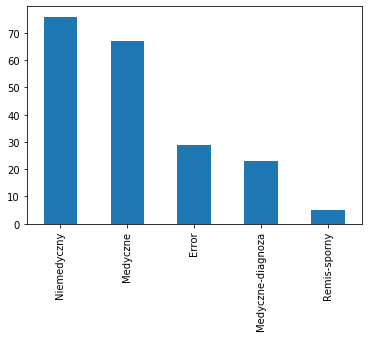

In [90]:
result['annotation_after_vote'].value_counts().plot(kind='bar')

In [115]:
REMIS  =  result.where(result['annotation_after_vote']=='Remis-sporny').dropna().reset_index()
REMIS

,index,id,text,annotation_after_vote
0,29,147461,...(..)cierpiała na krwotok i wydała na lekarz...,Remis-sporny
1,59,147492,"Trwa okres przeziębień, #grypy i katarów, dlat...",Remis-sporny
2,109,147536,"Jeśli w listopadzie mężczyzna zapuści wąsa, to...",Remis-sporny
3,188,147625,Jagody goji to jedne z najzdrowszych owoców św...,Remis-sporny
4,196,147511,Szczepionki i promieniowanie - redukcja biolog...,Remis-sporny


In [117]:
REMIS.loc[4]['text']

'Szczepionki i promieniowanie - redukcja biologiczna ludzi (film)  W filmie występują między innymi: dr. Hubert Czerniak, dziennikarz Piotr Moskwa, prepers Adolf Kudliński, Maria Ziemiańska, ks. Piotr Natanek, prof. dr hab. Maria Majewska, dr Jerzy Jaśkow..  https://t.co/cTdIAsnqB5  https://t.co/8Qd2JhSmT4'

In [20]:
a = input("Enter a character: ")
if((a>='a' and a<= 'z') or (a>='A' and a<='Z')):
    print(a, "AAAAAA")
else:
    print(a, "BBBBBB")

Enter a character: !@#
!@# BBBBBB


In [11]:
ord('a')


97

In [10]:
ord('z')

122

In [12]:
ord('A')

65

In [13]:
ord('Z')

90

In [14]:
ord('ę')

281

In [23]:
class Osoba:
  def __init__(self, nazwisko, wiek):
    self.nazwisko = nazwisko
    self.wiek = wieg

In [24]:
o = Osoba("Jan Kowalski", 25)
print(o.nazwisko)
print(o.wiek)

NameError: name 'wieg' is not defined

In [26]:
a = 12
b = 21
for x in range(a,b):
    if(x % 3) == 0:
        print(x)

12
15
18
